# Microsoft Movie Studios Analysis

**Authors:** Armun Shakeri
***

## Overview


This project analyzes current movie trends, budgets, gross income, and ratings in order to help Microsoft Studios best decide which movies to produce in its new upcoming studio. Analysis shows that if Microsoft studios produces movies that are in high demand positive gross profit will be reflected.



## Business Problem

Microsoft is seeking to enter into the movie industry and does not know what movies to create. We need to analyze what types of movies are currently trending, most popular movie genres, highest grossing movies of all time, highest budgeted movies, and movie title basics. For Microsoft's new movie studio to be profitable we need to pick a movie genre that is currently in demand and which movies had highest gross incomes, doing this ensures that the movie will have a positive inception and be profitable.  


## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

The following files imported are from various film rating institutions that will help identify what type of movie
Microsoft Studios should create next. These files include information on income, genres, ratings, and movie budgets. We intend to use variables mostly related to domestic gross income since we want Microsoft's first film to be profitable within the United States. 

In [53]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [14]:
# Here you run your code to explore the data

income = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip', error_bad_lines=False)
basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip', error_bad_lines=False)
ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip', error_bad_lines=False)
budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip', error_bad_lines=False)


In [15]:
income.info()
# the target variables here are title and domestic_gross

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [16]:
basics.head()
#the target variables are primary title and genre

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [17]:
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [18]:
budgets.info()
#the target variables are movie, production_budget, and domestic_gross

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

We are going to drop studio since microsoft will be using their own, year, and foreign_gross(income) since it is irrelevant in analyzing gross profit for a new movie within the United States.

In [19]:
# Here you run your code to clean the data
income.drop(['studio', 'year', 'foreign_gross'], axis=1, inplace=True)

In [20]:
income.sort_values('domestic_gross', ascending=False).head(10)

,title,domestic_gross
1872,Star Wars: The Force Awakens,936700000.0
3080,Black Panther,700100000.0
3079,Avengers: Infinity War,678800000.0
1873,Jurassic World,652300000.0
727,Marvel's The Avengers,623400000.0
2758,Star Wars: The Last Jedi,620200000.0
3082,Incredibles 2,608600000.0
2323,Rogue One: A Star Wars Story,532200000.0
2759,Beauty and the Beast (2017),504000000.0
2324,Finding Dory,486300000.0


The new film will be focusing on the domestic US market so for the budgets data release_date and worldwide_gross will be the dropped variables. Domestic_gross income will also be dropped since we are going to combine budgets and income. 

In [21]:
budgets.drop(['id', 'release_date', 'domestic_gross', 'worldwide_gross'], axis=1, inplace=True)

In [22]:
#rename 'movie' columns to title to merge income and budgets

budgets = budgets.rename(columns={'movie':'title'})

budgets.head()

,title,production_budget
0,Avatar,"$425,000,000"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000"
2,Dark Phoenix,"$350,000,000"
3,Avengers: Age of Ultron,"$330,600,000"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000"


In [24]:
#merge income and budgets by movie titles
movie_income_df = pd.merge(income, 
                              budgets, 
                              on=['title'], 
                              how='left')

movie_income_df.dropna().head()

#-convert production budget to integer.
    #remove "$" and commas using str.replace method

,title,domestic_gross,production_budget
0,Toy Story 3,415000000.0,"$200,000,000"
3,Inception,292600000.0,"$160,000,000"
4,Shrek Forever After,238700000.0,"$165,000,000"
5,The Twilight Saga: Eclipse,300500000.0,"$68,000,000"
6,Iron Man 2,312400000.0,"$170,000,000"


In [25]:
#sort new dataframe by highest domestic gross income

movie_income_df.sort_values(by='domestic_gross', ascending=False).dropna().head(20)

,title,domestic_gross,production_budget
3089,Black Panther,700100000.0,"$200,000,000"
3088,Avengers: Infinity War,678800000.0,"$300,000,000"
1879,Jurassic World,652300000.0,"$215,000,000"
3091,Incredibles 2,608600000.0,"$200,000,000"
2331,Rogue One: A Star Wars Story,532200000.0,"$200,000,000"
2332,Finding Dory,486300000.0,"$200,000,000"
1881,Avengers: Age of Ultron,459000000.0,"$330,600,000"
732,The Dark Knight Rises,448100000.0,"$275,000,000"
1134,The Hunger Games: Catching Fire,424700000.0,"$130,000,000"
3090,Jurassic World: Fallen Kingdom,417700000.0,"$170,000,000"


We will need to combine basics and ratings using the common variable 'tconst'. Doing so we will be able to 
analyze ratings of different movies in specific genres. This will allow us to decide what type of genre Microsoft
studios should focus on when creating the new movie. 

In [26]:
basics.drop(['start_year', 'runtime_minutes', 'original_title'], axis=1, inplace=True)
ratings.drop(['numvotes'], axis=1, inplace=True)

In [27]:
#renamed 'primary_title' to 'title'
basics = basics.rename(columns={'primary_title':'title'})

basics.head()

,tconst,title,genres
0,tt0063540,Sunghursh,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,Drama
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy"


In [28]:
ratings.head()

,tconst,averagerating
0,tt10356526,8.3
1,tt10384606,8.9
2,tt1042974,6.4
3,tt1043726,4.2
4,tt1060240,6.5


In order to accurately understand the ratings of each title we will need to combine basics and ratings by tconst. 

In [29]:
#merge movie ratings and basics, and drop all NaN values in average rating

movie_basics_df = pd.merge(basics, 
                              ratings, 
                              on=['tconst'], 
                              how='left')

movie_basics_df.sort_values(by='averagerating', ascending=False).dropna().head(20)


,tconst,title,genres,averagerating
87675,tt5089804,Fly High: Story of the Disc Dog,Documentary,10.0
120584,tt7259300,Calamity Kevin,"Adventure,Comedy",10.0
136750,tt8730716,Pick It Up! - Ska in the '90s,Documentary,10.0
144763,tt9715646,Renegade,Documentary,10.0
120109,tt7227500,Ellis Island: The Making of a Master Race in A...,"Documentary,History",10.0
4016,tt10378660,The Dark Knight: The Ballad of the N Word,"Comedy,Drama",10.0
117359,tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,Documentary,10.0
16767,tt1770682,Freeing Bernie Baran,"Crime,Documentary",10.0
1857,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Documentary,10.0
85426,tt4944240,Dog Days in the Heartland,Drama,10.0


Finally we will combine movie_income_df and movie_basics_df. This gives us a final dataframe with all the data we will need included within a central data set. 


In [30]:
movie_combined_df = pd.merge(movie_income_df, 
                              movie_basics_df, 
                              on=['title'], 
                              how='left')

movie_combined_df.drop(['tconst'], axis=1, inplace=True)
movie_combined_df = movie_combined_df.sort_values(by='domestic_gross', ascending=False).dropna().head(10) 
movie_combined_df

,title,domestic_gross,production_budget,genres,averagerating
3796,Black Panther,700100000.0,"$200,000,000","Action,Adventure,Sci-Fi",7.3
3795,Avengers: Infinity War,678800000.0,"$300,000,000","Action,Adventure,Sci-Fi",8.5
2282,Jurassic World,652300000.0,"$215,000,000","Action,Adventure,Sci-Fi",7.0
3798,Incredibles 2,608600000.0,"$200,000,000","Action,Adventure,Animation",7.7
2852,Rogue One: A Star Wars Story,532200000.0,"$200,000,000","Action,Adventure,Sci-Fi",7.8
2853,Finding Dory,486300000.0,"$200,000,000","Adventure,Animation,Comedy",7.3
2284,Avengers: Age of Ultron,459000000.0,"$330,600,000","Action,Adventure,Sci-Fi",7.3
894,The Dark Knight Rises,448100000.0,"$275,000,000","Action,Thriller",8.4
1385,The Hunger Games: Catching Fire,424700000.0,"$130,000,000","Action,Adventure,Sci-Fi",7.5
3797,Jurassic World: Fallen Kingdom,417700000.0,"$170,000,000","Action,Adventure,Sci-Fi",6.2


In order to make modeling this data easier, we will remove all "$" and "," from production_budget.

In [31]:
movie_combined_df.production_budget=movie_combined_df.production_budget.str.replace("$","")

In [32]:
movie_combined_df.production_budget=movie_combined_df.production_budget.str.replace(",","")

In [33]:
movie_combined_df.production_budget=movie_combined_df.production_budget.astype(int)

In [116]:
movie_combined_df.head(10)

,title,domestic_gross,production_budget,genres
3796,Black Panther,700100000.0,200000000,"Action,Adventure,Sci-Fi"
3795,Avengers: Infinity War,678800000.0,300000000,"Action,Adventure,Sci-Fi"
2282,Jurassic World,652300000.0,215000000,"Action,Adventure,Sci-Fi"
3798,Incredibles 2,608600000.0,200000000,"Action,Adventure,Animation"
2852,Rogue One: A Star Wars Story,532200000.0,200000000,"Action,Adventure,Sci-Fi"
2853,Finding Dory,486300000.0,200000000,"Adventure,Animation,Comedy"
2284,Avengers: Age of Ultron,459000000.0,330600000,"Action,Adventure,Sci-Fi"
894,The Dark Knight Rises,448100000.0,275000000,"Action,Thriller"
1385,The Hunger Games: Catching Fire,424700000.0,130000000,"Action,Adventure,Sci-Fi"
3797,Jurassic World: Fallen Kingdom,417700000.0,170000000,"Action,Adventure,Sci-Fi"


#### Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [108]:
movie_combined_df.describe()

,domestic_gross,production_budget
count,1.000000e+01,1.000000e+01
mean,5.407800e+08,2.220600e+08
std,1.097528e+08,6.131877e+07
min,4.177000e+08,1.300000e+08
25%,4.508250e+08,2.000000e+08
50%,5.092500e+08,2.000000e+08
75%,6.413750e+08,2.600000e+08
max,7.001000e+08,3.306000e+08


<AxesSubplot:xlabel='production_budget', ylabel='title'>

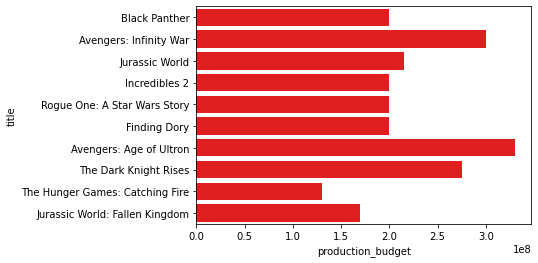

In [121]:
#movie_combined_df.groupby('title').sum().plot(kind='bar')
sns.barplot(y="title", x="production_budget", data=movie_combined_df[:10], color= 'red')

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 0., 1.]),
 array([2.1500e+08, 2.2078e+08, 2.2656e+08, 2.3234e+08, 2.3812e+08,
        2.4390e+08, 2.4968e+08, 2.5546e+08, 2.6124e+08, 2.6702e+08,
        2.7280e+08, 2.7858e+08, 2.8436e+08, 2.9014e+08, 2.9592e+08,
        3.0170e+08, 3.0748e+08, 3.1326e+08, 3.1904e+08, 3.2482e+08,
        3.3060e+08]),
 <BarContainer object of 20 artists>)

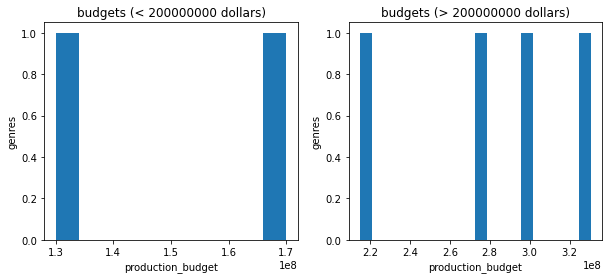

In [132]:
budget_fig, budget_axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))


budget_axes[0].set_title('budgets (< 200000000 dollars)')
budget_axes[0].set_ylabel('genres')
budget_axes[0].set_xlabel('production_budget')

budget_axes[1].set_title('budgets (> 200000000 dollars)')
budget_axes[1].set_ylabel('genres')
budget_axes[1].set_xlabel('production_budget')

budget_low = movie_combined_df['production_budget'][movie_combined_df['production_budget'] < 200000000]
budget_high = movie_combined_df['production_budget'][movie_combined_df['production_budget'] > 200000000]

budget_axes[0].hist(budget_low, bins=10)
budget_axes[1].hist(budget_high, bins=20)


<AxesSubplot:xlabel='domestic_gross', ylabel='title'>

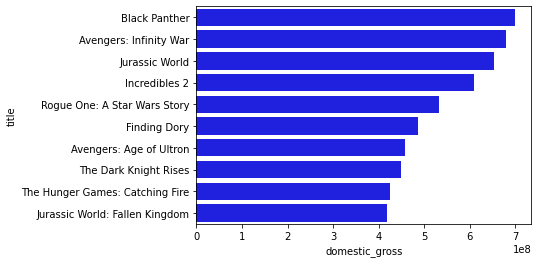

In [120]:
sns.barplot(y="title", x="domestic_gross", data=movie_combined_df[:10], color= 'blue')

<AxesSubplot:xlabel='genres', ylabel='title'>

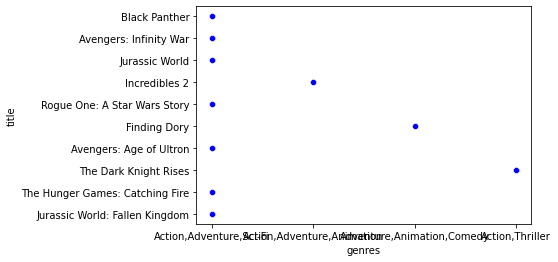

In [117]:
sns.scatterplot(y="title", x="genres", data=movie_combined_df[:10], color= 'blue')

In [119]:
#movie_combined_df[:10].plot.scatter(x = 'genres', y = 'title')

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***